# Examples of binning histograms

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from matplotlib import rc
import cmasher as cmr
from astropy.visualization import hist as asthist

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font', family='serif')

cmap = cmr.rainforest                   # CMasher
cmap = plt.get_cmap('cmr.pride')   # MPL
colsample = cmap.colors[::25]

In [2]:
np.random.seed(0)
rand_dist = np.concatenate([sts.cauchy(-5, 1.8).rvs(500),
                            sts.cauchy(-4, 0.8).rvs(2000),
                            sts.cauchy(-1, 0.3).rvs(500),
                            sts.cauchy(2, 0.8).rvs(1000),
                            sts.cauchy(4, 1.5).rvs(500)])

# truncate values to a reasonable range
rand_dist = rand_dist[(rand_dist > -15) & (rand_dist < 15)]


There are too many methods for a single plot, we do them in two groups:

#### Group 1

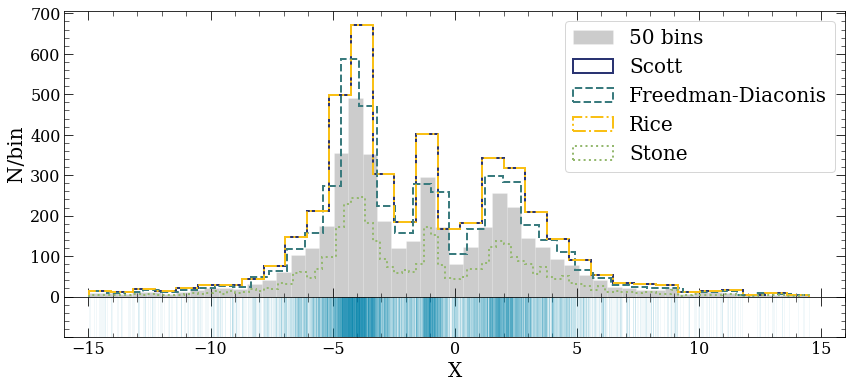

In [3]:
fig = plt.figure(figsize=(14,6))
ax1 = plt.subplot2grid((8,1),(0,0),fig=fig,rowspan=7)
ax1.hist(rand_dist,bins=50,density=False, color='k',alpha=0.2, label='50 bins',edgecolor='white')
ax1.hist(rand_dist, histtype='step', bins='scott',density=False, color=colsample[2],alpha=1, label='Scott', linestyle='-',linewidth=2)
ax1.hist(rand_dist, histtype='step', bins='fd',density=False, color=colsample[5],alpha=1, label='Freedman-Diaconis', linestyle='--',linewidth=2)
ax1.hist(rand_dist, histtype='step', bins='rice',density=False, color=colsample[11],alpha=1, label='Rice', linestyle='-.',linewidth=2)
ax1.hist(rand_dist, histtype='step', bins='stone',density=False, color=colsample[8],alpha=1, label='Stone', linestyle=':',linewidth=2)
#ax1.hist(rand_dist, histtype='step', bins='sturges',density=False, color=colsample[14],alpha=1, label='Sturges', linestyle='-',linewidth=2)
#ax1.hist(rand_dist, histtype='step', bins='sqrt',density=False, color=colsample[17],alpha=1, label='Sqrt', linestyle='-.',linewidth=2)
#asthist(rand_dist, histtype='step', bins='blocks',density=False, color=colsample[20],alpha=1, label='BBlocks', linestyle=':',linewidth=2)

ax1.set_ylabel('N/bin',fontsize=20)
ax1.set_xlim(-16,16)
ax1.legend(fontsize=20)
ax1.minorticks_on()
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(axis='both', which='major', length=9)
ax1.tick_params(axis='both', which='minor', length=4.5)
ax1.tick_params(axis='both', which='both',direction='in',right=True,top=True)
ax1.set_xticklabels([])
ax2 = plt.subplot2grid((8,1),(7,0),fig=fig)
ax2.vlines(rand_dist,0,1,alpha=0.1,linewidth=0.5,color='#0186AF')
ax2.set_xlabel('X',fontsize=20)
ax2.set_ylim(0,1)
ax2.set_xlim(-16,16)
ax2.minorticks_on()
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', length=9)
ax2.tick_params(axis='both', which='minor', length=4.5)
ax2.tick_params(axis='both', which='both',direction='in',right=True,top=True)
ax2.set_yticklabels([])
fig.subplots_adjust(wspace=0.2,hspace=0)

fig.savefig('hist_binning1.jpg',bbox_inches='tight',dpi=300)

#### Group 2

**Caution**: As mentioned in the lecture, bayesian blocks is not available in `numpy` or `matplotlib`. I have used `astropy` which is not installed in the Binder - you can comment the indicated line out.

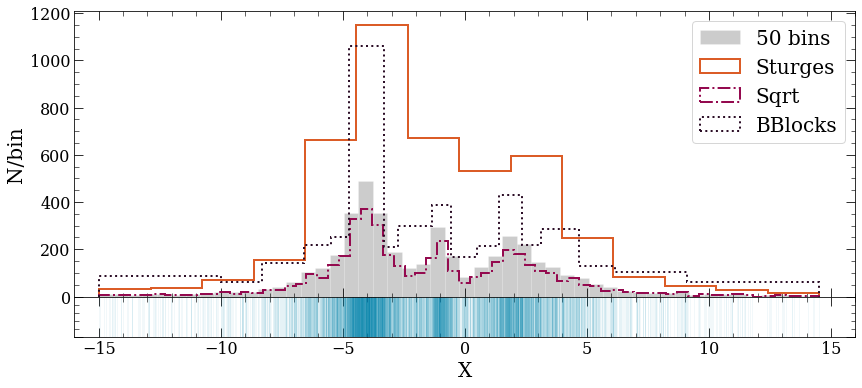

In [4]:
fig = plt.figure(figsize=(14,6))
ax1 = plt.subplot2grid((8,1),(0,0),fig=fig,rowspan=7)
ax1.hist(rand_dist,bins=50,density=False, color='k',alpha=0.2, label='50 bins',edgecolor='white')
#ax1.hist(rand_dist, histtype='step', bins='scott',density=False, color=colsample[2],alpha=1, label='Scott', linestyle='--',linewidth=2)
#ax1.hist(rand_dist, histtype='step', bins='fd',density=False, color=colsample[5],alpha=1, label='Freedman-Diaconis', linestyle='-',linewidth=2)
#ax1.hist(rand_dist, histtype='step', bins='rice',density=False, color=colsample[8],alpha=1, label='Rice', linestyle='-.',linewidth=2)
#ax1.hist(rand_dist, histtype='step', bins='stone',density=False, color=colsample[11],alpha=1, label='Stone', linestyle=':',linewidth=2)
ax1.hist(rand_dist, histtype='step', bins='sturges',density=False, color=colsample[14],alpha=1, label='Sturges', linestyle='-',linewidth=2)
ax1.hist(rand_dist, histtype='step', bins='sqrt',density=False, color=colsample[17],alpha=1, label='Sqrt', linestyle='-.',linewidth=2)

# bayesian block - comment out if astropy is not available
asthist(rand_dist, histtype='step', bins='blocks',density=False, color=colsample[20],alpha=1, label='BBlocks', linestyle=':',linewidth=2)

ax1.set_ylabel('N/bin',fontsize=20)
ax1.set_xlim(-16,16)
ax1.legend(fontsize=20)
ax1.minorticks_on()
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(axis='both', which='major', length=9)
ax1.tick_params(axis='both', which='minor', length=4.5)
ax1.tick_params(axis='both', which='both',direction='in',right=True,top=True)
ax1.set_xticklabels([])
ax2 = plt.subplot2grid((8,1),(7,0),fig=fig)
ax2.vlines(rand_dist,0,1,alpha=0.1,linewidth=0.5,color='#0186AF')
ax2.set_xlabel('X',fontsize=20)
ax2.set_ylim(0,1)
ax2.set_xlim(-16,16)
ax2.minorticks_on()
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', length=9)
ax2.tick_params(axis='both', which='minor', length=4.5)
ax2.tick_params(axis='both', which='both',direction='in',right=True,top=True)
ax2.set_yticklabels([])
fig.subplots_adjust(wspace=0.2,hspace=0)

fig.savefig('hist_binning2.jpg',bbox_inches='tight',dpi=300)